In [ ]:
!pip install --upgrade yfinance
#!pip install yfinance==0.2.54

In [1]:
# Get Data from yfinance

import requests
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

import os
os.environ["OMP_NUM_THREADS"] = "1"

def data_collection():
    # The top 30 cryptocurrencies on yahoo finance fluctuates, therefore using an API to fetch the up-to-date data is vital
    # The following data would be those at the time of the assessment (from 2024-05-08 to 2025-05-07)
    
    # Get top 50 cryptocurrencies from CoinGecko
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "usd",
        "order": "market_cap_desc",
        "per_page": 50,  # Get the top 50 - including backups in case a currency contains NaN values as data
        "page": 1,
        "sparkline": False
    }
    
    response = requests.get(url, params=params)
    top_coins = response.json()
    
    # Convert symbols to Yahoo Finance tickers (Most work as "SYMBOL-USD")
    crypto_tickers = [coin["symbol"].upper() + "-USD" for coin in top_coins]
    
    # Set the start date and end date
    end_date = datetime.now()
    start_date = end_date - timedelta(days=int(365-1))
    # 365 days to indicate one year
    
    df = yf.download(crypto_tickers, start='2024-05-08',end='2025-05-08')
    # df = yf.download(crypto_tickers, start=start_date, end=end_date)
    # CAUTION! -- downloading from yfinance results in a multi-index dataframe
    
    # Grouping the cryptocurrencies
    df = df.Close
    # Close = the price when the market closed in the afternoon
    
    # reset index - separates index (named 'Date') and 'Ticker' column
    # df = df.reset_index()
    
    # Check if the dataframe contain any NaN values
    if df.isna().any().any() == True:
        # Check which columns contain any NaN values
        nan_columns = df.columns[df.isna().any()]
        
        # Drop the currencies with NaN values
        df.drop(columns=nan_columns, inplace=True)
        
        # Truncate the dataframe if bigger than 30 columns
        if df.shape[1] > 30:
            df = df.iloc[:, :30]
            
    return df

In [2]:
df = data_collection()
df

[                       0%                       ]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  50 of 50 completed

6 Failed downloads:
['TAO-USD', 'PEPE-USD', 'USDS-USD', 'BUIDL-USD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-08 -> 2025-05-08)')
['SUSDS-USD', 'BSC-USD-USD']: HTTPError('HTTP Error 404: ')


Ticker,AAVE-USD,ADA-USD,AVAX-USD,BCH-USD,BGB-USD,BNB-USD,BTC-USD,CRO-USD,DAI-USD,DOGE-USD,...,ONDO-USD,SHIB-USD,SOL-USD,STETH-USD,TON-USD,TRUMP-USD,TRX-USD,USDC-USD,USDT-USD,WBT-USD
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-08,86.239540,0.452553,34.047199,448.203674,1.122098,588.197449,61187.941406,0.124913,0.999871,0.143294,...,0.768358,0.000023,142.294739,2971.244873,2.129303,0.001378,0.122878,0.999911,0.999585,9.879747
2024-05-09,89.907631,0.463501,35.080654,454.960693,1.105942,596.031982,63049.960938,0.127320,1.000063,0.152117,...,0.817347,0.000023,152.849945,3035.815430,2.407396,0.001433,0.126193,1.000068,0.999868,9.950467
2024-05-10,84.166153,0.448250,33.712517,426.730865,1.076267,585.622192,60792.777344,0.122997,0.999903,0.144031,...,0.802826,0.000022,146.216904,2910.245850,2.113580,0.001355,0.127366,1.000102,0.999861,9.865792
2024-05-11,82.197479,0.438876,33.479149,429.465179,1.090261,592.027893,60793.710938,0.124067,0.999911,0.142924,...,0.786848,0.000022,145.314377,2910.132568,2.239010,0.001334,0.126392,0.999965,0.999759,9.855301
2024-05-12,83.022903,0.437653,33.167240,433.157928,1.084972,594.424561,61448.394531,0.124738,0.999808,0.141231,...,0.785271,0.000022,143.520813,2929.624268,2.301618,0.001306,0.127317,1.000027,0.999566,9.896446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-03,178.055588,0.701027,20.548115,363.120483,4.373414,599.331360,95891.796875,0.089778,0.999930,0.175757,...,0.876391,0.000013,146.796051,1833.355957,3.089230,0.000425,0.245591,0.999974,1.000240,28.865047
2025-05-04,171.458511,0.676692,19.901276,356.130066,4.319484,585.995056,94315.976562,0.088232,0.999943,0.170552,...,0.858976,0.000013,143.983063,1807.314453,0.759592,0.000425,0.247087,0.999974,1.000024,28.503326
2025-05-05,176.909439,0.662976,19.685112,353.487152,4.302570,597.689758,94748.054688,0.088357,0.999946,0.170604,...,0.867316,0.000013,146.696640,1818.181519,1.328356,0.000425,0.248288,0.999884,0.999872,28.600248


In [3]:
# Check again if the dataframe contains NaN values
df.isna().any().any()

False

In [4]:
# Transpose
df_t = df.T

# dataframe shape
df.shape # (columns, rows)

(365, 30)

In [63]:
# Min-Max scaling commonly recommended for K-Means clustering

from sklearn.preprocessing import MinMaxScaler

# Transpose so that scaling is applied per coin (row)
scaled_df = pd.DataFrame(
    MinMaxScaler().fit_transform(df_t),
    index=df_t.index,
    columns=df_t.columns
)

scaled_df

Date,2024-05-08,2024-05-09,2024-05-10,2024-05-11,2024-05-12,2024-05-13,2024-05-14,2024-05-15,2024-05-16,2024-05-17,...,2025-04-28,2025-04-29,2025-04-30,2025-05-01,2025-05-02,2025-05-03,2025-05-04,2025-05-05,2025-05-06,2025-05-07
Ticker,,,,,,,,,,,,,,,,,,,,,
AAVE-USD,0.001409,0.001426,0.001384,0.001352,0.001351,0.001316,0.001307,0.001299,0.001318,0.001317,...,1.751765e-03,1.758601e-03,1.743823e-03,1.793147e-03,1.803591e-03,1.856838e-03,1.817916e-03,1.867156e-03,1.839318e-03,1.742919e-03
ADA-USD,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,...,7.427619e-06,7.385253e-06,7.238472e-06,7.310643e-06,7.202853e-06,7.310469e-06,7.174596e-06,6.997115e-06,7.007765e-06,6.836081e-06
AVAX-USD,0.000556,0.000556,0.000555,0.000551,0.000540,0.000515,0.000513,0.000523,0.000528,0.000543,...,2.299694e-04,2.285666e-04,2.219512e-04,2.243213e-04,2.192581e-04,2.142843e-04,2.110063e-04,2.077626e-04,2.068973e-04,1.980467e-04
BCH-USD,0.007325,0.007216,0.007019,0.007064,0.007049,0.006953,0.006966,0.007004,0.006820,0.006954,...,3.834744e-03,3.856787e-03,3.887463e-03,3.742531e-03,3.950830e-03,3.786773e-03,3.775925e-03,3.730812e-03,3.853769e-03,3.728179e-03
BGB-USD,0.000018,0.000018,0.000018,0.000018,0.000018,0.000017,0.000017,0.000016,0.000016,0.000016,...,4.638613e-05,4.644858e-05,4.633968e-05,4.541224e-05,4.577422e-05,4.560767e-05,4.579787e-05,4.541050e-05,4.461733e-05,4.393461e-05
BNB-USD,0.009613,0.009453,0.009633,0.009738,0.009674,0.009405,0.009207,0.008784,0.008726,0.008668,...,6.384217e-03,6.374612e-03,6.365554e-03,6.217263e-03,6.203320e-03,6.250079e-03,6.213105e-03,6.308201e-03,6.223744e-03,6.198085e-03
BTC-USD,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
CRO-USD,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,9.531079e-07,9.510017e-07,9.364241e-07,9.355147e-07,9.476621e-07,9.361072e-07,9.353559e-07,9.324097e-07,9.349244e-07,9.347423e-07
DAI-USD,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000015,0.000015,0.000015,...,1.052997e-05,1.060671e-05,1.061558e-05,1.036109e-05,1.031892e-05,1.042756e-05,1.060192e-05,1.055360e-05,1.033146e-05,1.036053e-05


In [81]:
# Autoencoder as dimensionality reduction technique - because non-linearity was detected

import numpy as np
import pandas as pd
from keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Convert to NumPy array
X = scaled_df.values.astype(np.float32)

encoding_dim = 4 # reduce to 4 features - spits error if smaller than number of clusters e.g., 2

# Input layer
input_layer = Input(shape=(X.shape[1],))

# Encoder
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded_output = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(32, activation='relu')(encoded_output)
decoded = Dense(64, activation='relu')(decoded)
decoded_output = Dense(X.shape[1], activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded_output)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
autoencoder.fit(X, X, epochs=100, batch_size=8, shuffle=True, verbose=1)

# Define the encoder model (for extracting the compressed representation)
encoder = Model(input_layer, encoded_output)

# Get compressed features
encoded_X = encoder.predict(X)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_X, index=scaled_df.index)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2448
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2468 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2455 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2435 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2417 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2364 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2342 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2279 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2210 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2121 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1959 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1784 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1601 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1284 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0983 
Epoch 16/100
4/4 ━━━

In [82]:
from sklearn.cluster import KMeans

# Ensure all column names are strings
encoded_df.columns = encoded_df.columns.astype(str)

# Define the model with recommended n_init fix
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42) # number of clusters = 4

# Fit and predict cluster labels
clusters = kmeans.fit_predict(encoded_df)

# Add cluster labels to the DataFrame
encoded_df['Cluster'] = clusters

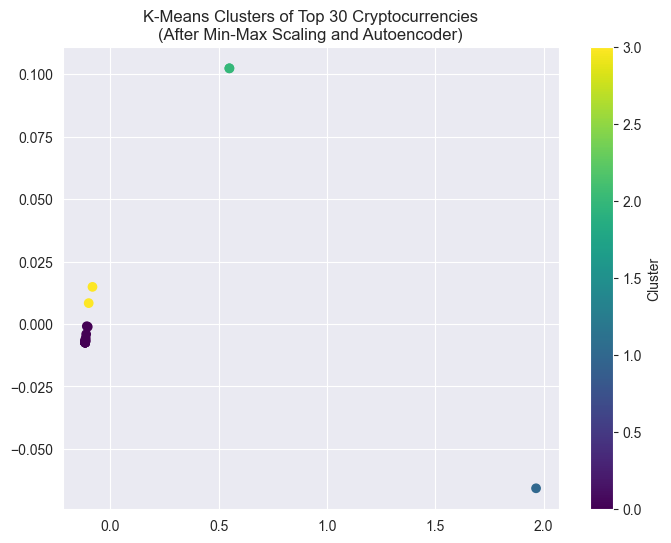

In [89]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_df.drop('Cluster', axis=1))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=encoded_df['Cluster'], cmap='viridis')
plt.title('K-Means Clusters of Top 30 Cryptocurrencies\n(After Min-Max Scaling and Autoencoder)')
plt.colorbar(label='Cluster')
plt.grid(True)
# saves clusters as a png file
plt.savefig(r'C:\Users\Senju\Downloads\cluster.png')
plt.show()

In [90]:
# Create a dictionary where keys are cluster labels and values are arrays of index values
cluster_groups = {
    cluster: encoded_df[encoded_df['Cluster'] == cluster].index.to_numpy()
    for cluster in encoded_df['Cluster'].unique()
}
cluster_groups

{0: array(['AAVE-USD', 'ADA-USD', 'AVAX-USD', 'BGB-USD', 'CRO-USD', 'DAI-USD',
        'DOGE-USD', 'DOT-USD', 'ETC-USD', 'GT-USD', 'HBAR-USD', 'ICP-USD',
        'LEO-USD', 'LINK-USD', 'LTC-USD', 'NEAR-USD', 'OKB-USD',
        'ONDO-USD', 'SHIB-USD', 'SOL-USD', 'TON-USD', 'TRX-USD',
        'USDC-USD', 'USDT-USD', 'WBT-USD'], dtype=object),
 3: array(['BCH-USD', 'BNB-USD'], dtype=object),
 1: array(['BTC-USD'], dtype=object),
 2: array(['ETH-USD', 'STETH-USD'], dtype=object)}

In [91]:
df_t.loc[cluster_groups[0]]

Date,2024-05-08,2024-05-09,2024-05-10,2024-05-11,2024-05-12,2024-05-13,2024-05-14,2024-05-15,2024-05-16,2024-05-17,...,2025-04-28,2025-04-29,2025-04-30,2025-05-01,2025-05-02,2025-05-03,2025-05-04,2025-05-05,2025-05-06,2025-05-07
Ticker,,,,,,,,,,,,,,,,,,,,,
AAVE-USD,86.239540,89.907631,84.166153,82.197479,83.022903,82.756897,80.418915,86.096199,85.950447,88.295654,...,166.380447,165.809311,164.280853,173.024979,174.786163,178.055588,171.458511,176.909439,178.050507,168.266556
ADA-USD,0.452553,0.463501,0.448250,0.438876,0.437653,0.436540,0.428069,0.452988,0.459695,0.482000,...,0.705480,0.696330,0.681930,0.705434,0.698042,0.701027,0.676692,0.662976,0.678382,0.659988
AVAX-USD,34.047199,35.080654,33.712517,33.479149,33.167240,32.421722,31.568510,34.679607,34.461540,36.423485,...,21.842216,21.550371,20.909435,21.645304,21.248335,20.548115,19.901276,19.685112,20.028181,19.120029
BGB-USD,1.122098,1.105942,1.076267,1.090261,1.084972,1.071455,1.045005,1.091757,1.074570,1.089495,...,4.405710,4.379408,4.365550,4.381946,4.435996,4.373414,4.319484,4.302570,4.319081,4.241590
CRO-USD,0.124913,0.127320,0.122997,0.124067,0.124738,0.123583,0.119712,0.125665,0.123569,0.126247,...,0.090539,0.089678,0.088231,0.090283,0.091851,0.089778,0.088232,0.088357,0.090516,0.090255
DAI-USD,0.999871,1.000063,0.999903,0.999911,0.999808,0.999996,0.999884,0.999939,0.999908,1.000054,...,1.000137,1.000064,1.000078,0.999779,1.000020,0.999930,0.999943,0.999946,1.000124,1.000249
DOGE-USD,0.143294,0.152117,0.144031,0.142924,0.141231,0.148434,0.145419,0.155526,0.149637,0.155563,...,0.178952,0.174636,0.172340,0.180759,0.181577,0.175757,0.170552,0.170604,0.172116,0.169505
DOT-USD,6.990119,7.050120,6.749962,6.659228,6.620379,6.665498,6.478902,6.963480,7.029125,7.196756,...,4.238256,4.146282,4.068165,4.176703,4.163291,4.033396,3.920791,3.918757,3.967502,3.888314
ETC-USD,27.157541,27.668243,26.396765,26.457214,26.713799,26.275000,25.327702,27.100901,27.253609,28.310291,...,16.995129,16.728729,16.513252,16.895693,17.205612,16.642113,16.010334,16.025131,16.248034,15.857380


In [92]:
df_t.loc[cluster_groups[1]]

Date,2024-05-08,2024-05-09,2024-05-10,2024-05-11,2024-05-12,2024-05-13,2024-05-14,2024-05-15,2024-05-16,2024-05-17,...,2025-04-28,2025-04-29,2025-04-30,2025-05-01,2025-05-02,2025-05-03,2025-05-04,2025-05-05,2025-05-06,2025-05-07
Ticker,,,,,,,,,,,,,,,,,,,,,
BTC-USD,61187.941406,63049.960938,60792.777344,60793.710938,61448.394531,62901.449219,61552.789062,66267.492188,65231.582031,67051.875,...,94978.75,94284.789062,94207.3125,96492.335938,96910.070312,95891.796875,94315.976562,94748.054688,96802.476562,96542.960938


In [93]:
df_t.loc[cluster_groups[2]]

Date,2024-05-08,2024-05-09,2024-05-10,2024-05-11,2024-05-12,2024-05-13,2024-05-14,2024-05-15,2024-05-16,2024-05-17,...,2025-04-28,2025-04-29,2025-04-30,2025-05-01,2025-05-02,2025-05-03,2025-05-04,2025-05-05,2025-05-06,2025-05-07
Ticker,,,,,,,,,,,,,,,,,,,,,
ETH-USD,2973.657227,3036.020508,2909.79126,2911.602051,2928.701904,2949.359619,2881.157959,3037.056641,2945.131104,3094.118652,...,1798.851807,1799.175659,1793.775391,1839.221558,1842.707886,1833.839722,1808.594238,1819.697510,1815.087524,1803.887085
STETH-USD,2971.244873,3035.815430,2910.24585,2910.132568,2929.624268,2946.826660,2879.039307,3033.309570,2941.886963,3089.429443,...,1798.052612,1793.546875,1792.497681,1838.024902,1840.490356,1833.355957,1807.314453,1818.181519,1815.161255,1804.570679


In [94]:
df_t.loc[cluster_groups[3]]

Date,2024-05-08,2024-05-09,2024-05-10,2024-05-11,2024-05-12,2024-05-13,2024-05-14,2024-05-15,2024-05-16,2024-05-17,...,2025-04-28,2025-04-29,2025-04-30,2025-05-01,2025-05-02,2025-05-03,2025-05-04,2025-05-05,2025-05-06,2025-05-07
Ticker,,,,,,,,,,,,,,,,,,,,,
BCH-USD,448.203674,454.960693,426.730865,429.465179,433.157928,437.340942,428.791107,464.115723,444.849121,466.264130,...,364.219208,363.636383,366.227478,361.125610,382.875244,363.120483,356.130066,353.487152,373.054443,359.929413
BNB-USD,588.197449,596.031982,585.622192,592.027893,594.424561,591.606934,566.707031,582.074341,569.190247,581.178345,...,606.364990,601.028992,599.681702,599.918213,601.164185,599.331360,585.995056,597.689758,602.473877,598.381531


In [97]:
# Choose a currency from each group (four in total)

# cluster 1 - CRO-USD
# cluster 2 - BTC-USD
# cluster 3 - STETH-USD
# cluster 4 - BCH-USD
# The cluster groups will be different every time -
# The above were the cluster groups at the time of assessment
# (data from 2024-05-08 to 2025-05-07)

encoded_df = encoded_df.drop('Cluster', axis=1)

# create a list with 4 chosen currencies
chosen_currencies = ['CRO-USD', 'BTC-USD', 'STETH-USD', 'BCH-USD']
df_t.loc[chosen_currencies]

Date,2024-05-08,2024-05-09,2024-05-10,2024-05-11,2024-05-12,2024-05-13,2024-05-14,2024-05-15,2024-05-16,2024-05-17,...,2025-04-28,2025-04-29,2025-04-30,2025-05-01,2025-05-02,2025-05-03,2025-05-04,2025-05-05,2025-05-06,2025-05-07
Ticker,,,,,,,,,,,,,,,,,,,,,
CRO-USD,0.124913,0.127320,0.122997,0.124067,0.124738,0.123583,0.119712,0.125665,0.123569,0.126247,...,0.090539,0.089678,0.088231,0.090283,0.091851,0.089778,0.088232,0.088357,0.090516,0.090255
BTC-USD,61187.941406,63049.960938,60792.777344,60793.710938,61448.394531,62901.449219,61552.789062,66267.492188,65231.582031,67051.875000,...,94978.750000,94284.789062,94207.312500,96492.335938,96910.070312,95891.796875,94315.976562,94748.054688,96802.476562,96542.960938
STETH-USD,2971.244873,3035.815430,2910.245850,2910.132568,2929.624268,2946.826660,2879.039307,3033.309570,2941.886963,3089.429443,...,1798.052612,1793.546875,1792.497681,1838.024902,1840.490356,1833.355957,1807.314453,1818.181519,1815.161255,1804.570679
BCH-USD,448.203674,454.960693,426.730865,429.465179,433.157928,437.340942,428.791107,464.115723,444.849121,466.264130,...,364.219208,363.636383,366.227478,361.125610,382.875244,363.120483,356.130066,353.487152,373.054443,359.929413


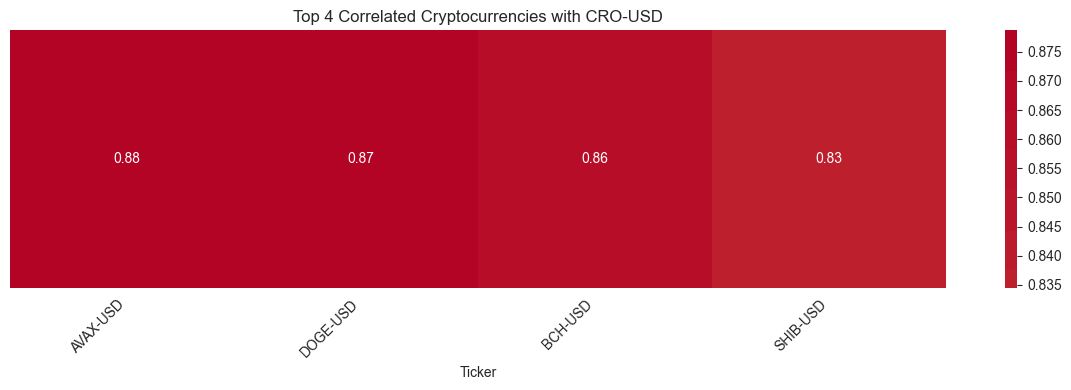

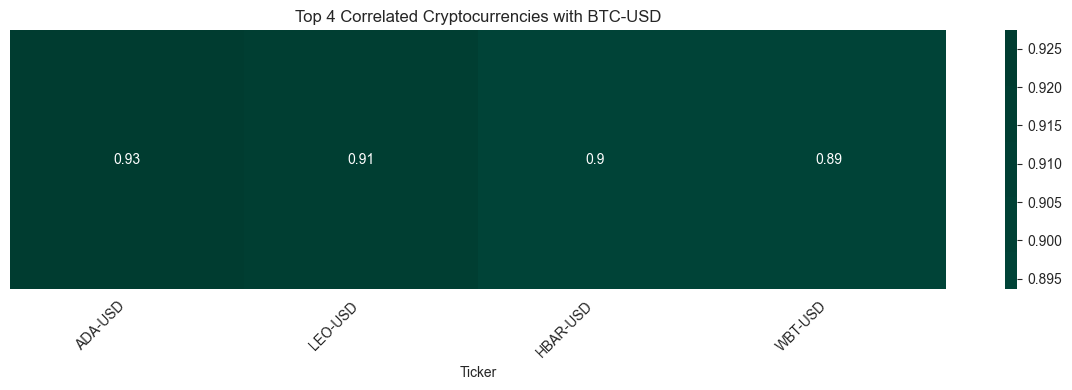

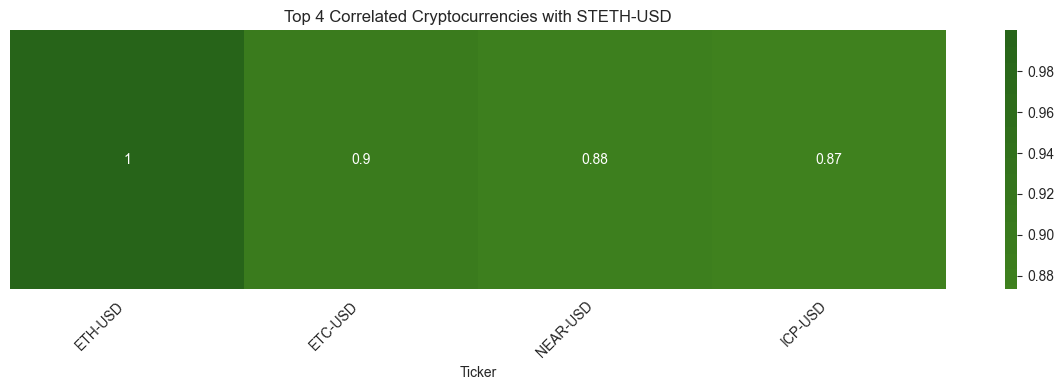

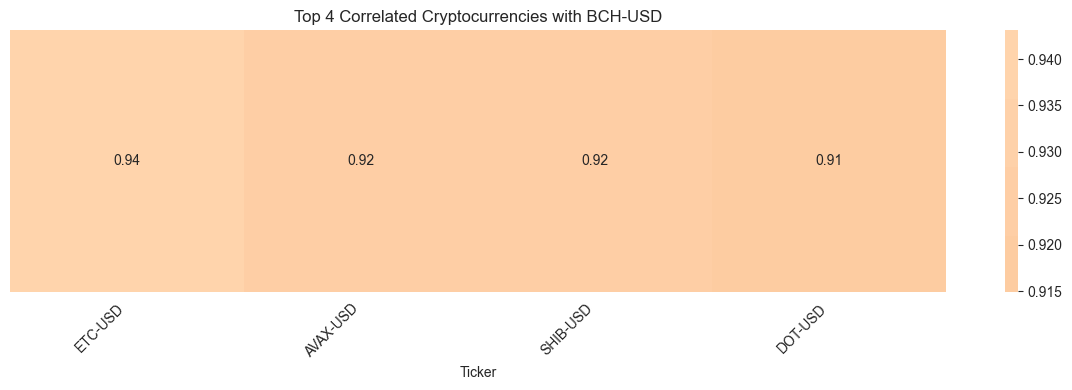

In [101]:
import seaborn as sns

# Pearson correlation heatmap
# Top 4 correlated currencies for each chosen currency

def top_correlated(df, currency, top_n, plot, cmap):
    # Drop any columns with NaNs
    df = df.dropna(axis=1)

    # Ensure target coin is in the DataFrame
    if currency not in df.columns:
        raise ValueError(f"{currency} not found in the DataFrame.")

    # Compute correlation matrix
    corr_matrix = df.corr(method='pearson')

    # Get correlation values for the target coin (excluding itself)
    coin_corr = corr_matrix[currency].drop(labels=[currency])

    # Sort by absolute correlation and return top N
    top_corr = coin_corr.reindex(coin_corr.abs().sort_values(ascending=False).index).head(top_n)
    
    if plot == True:
        plt.figure(figsize=(12, 4))
        sns.heatmap(top_corr.to_frame().T, annot=True, cmap=cmap, center=0, cbar=True)
        plt.title(f'Top {top_n} Correlated Cryptocurrencies with {currency}')
        plt.yticks([])  # Hide y-axis since it's only one row
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        # saves heatmap as a png file
        plt.savefig(r'C:\Users\Senju\Downloads\heatmap_' + currency + '.png')
        plt.show()

top_correlated(df, chosen_currencies[0], 4, True, 'coolwarm')
top_correlated(df, chosen_currencies[1], 4, True, 'BrBG')
top_correlated(df, chosen_currencies[2], 4, True, 'PiYG')
top_correlated(df, chosen_currencies[3], 4, True, None)

In [19]:
# EDA

In [ ]:
# LSTM

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
import joblib
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Train LSTM model
def train_lstm(df, ticker, 
                            seq_len=60, # between 50-90 is common in finance
                            batch_size=16, # smaller the batch, more stable generalization (but slower)
                            epochs=200): # this for now, let early stopping find the optimal number
    
    # Prepare the price data
    prices = df[ticker].values.reshape(-1, 1)

    # Create sequences
    def create_sequences(data, seq_len):
        X, y = [], []
        for i in range(len(data) - seq_len):
            X.append(data[i:i+seq_len])
            y.append(data[i+seq_len])
        return np.array(X), np.array(y)

    # Create sequences before scaling
    X_full, y_full = create_sequences(prices, seq_len)

    # Split data (training, testing, validation - 70:15:15)
    total = len(X_full)
    train_end = int(0.7 * total)
    val_end = int(0.85 * total)

    X_train, y_train = X_full[:train_end], y_full[:train_end]
    X_val, y_val = X_full[train_end:val_end], y_full[train_end:val_end]
    X_test, y_test = X_full[val_end:], y_full[val_end:]
    
    # Fit scaler ONLY on training targets
    scaler = MinMaxScaler()
    y_train_scaled = scaler.fit_transform(y_train)
    
    # Apply the same scaler to validation and test targets
    y_val_scaled = scaler.transform(y_val)
    y_test_scaled = scaler.transform(y_test)
    
    # Also scale the input sequences using same fitted scaler
    X_train_scaled = scaler.transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
    X_val_scaled = scaler.transform(X_val.reshape(-1, 1)).reshape(X_val.shape)
    X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)

    # Build the model
    model = Sequential([
        Input(shape=(seq_len, 1)),   # Explicit input shape
        LSTM(100, return_sequences=True),  # First LSTM, more units, returns sequence
        Dropout(0.2), # helps with over-fitting
        LSTM(50, return_sequences=False),  # Second LSTM, fewer units
        Dropout(0.2), # helps with over-fitting
        Dense(1) # activation function not needed
    ])
    optimizer = Adam(learning_rate=0.003)
    model.compile(optimizer=optimizer, loss='mse')
    
    # Define early stopping
    early_stop = EarlyStopping(
        monitor='val_loss',        # Watch validation loss
        patience=10,               # Stop after 10 epochs with no improvement
        restore_best_weights=True # Keep the best model
    )
    
    # Train model
    history = model.fit(
        X_train_scaled, y_train_scaled,
        validation_data=(X_val_scaled, y_val_scaled),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=1  # Set to 1 if you want detailed logs
    )
    
    # Inverse transform predictions and true values
    test_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_actual = scaler.inverse_transform(y_test_scaled)
    
    # Evaluation metrics
    rmse = np.sqrt(np.mean((y_pred - y_actual) ** 2))
    mae = np.mean(np.abs(y_pred - y_actual))
    mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
    
    print(f"{ticker} - Test MSE: {test_loss:.4f}")
    print(f"{ticker} - Test RMSE (USD): {rmse:.2f}")
    print(f"{ticker} - Test MAE  (USD): {mae:.2f}")
    print(f"{ticker} - Test MAPE (%): {mape:.2f}")
    
    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{ticker} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # save plot as png
    plt.savefig(r'C:\Users\Senju\Downloads\optimized_LSTM_loss_vs_epoch_' + ticker + '.png')
    plt.show()

    # Save model
    model.save(f"{ticker.lower().replace('-', '_')}_optimized_lstm_model.keras")
    
    # Save training history
    joblib.dump(history.history, f"{ticker}_optimized_lstm_history.pkl")
        
    # Save scaler
    joblib.dump(scaler, f'{ticker}_optimized_lstm_scaler.pkl')

[*********************100%***********************]  50 of 50 completed

6 Failed downloads:
['BSC-USD-USD', 'SUSDS-USD']: YFTzMissingError('possibly delisted; no timezone found')
['BUIDL-USD', 'USDS-USD', 'TAO-USD', 'PEPE-USD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-08 -> 2025-05-08)')


Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0469 - val_loss: 0.0045
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - val_loss: 0.0028
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - val_loss: 0.0033
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - val_loss: 0.0029
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0070 - val_loss: 0.0034
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0087 - val_loss: 0.0033
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0072 - val_loss: 0.0022
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0099 - val_loss: 0.0027
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - val_loss: 0.0049
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - val_loss: 0.0035
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0056 - val_loss: 0.0018
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

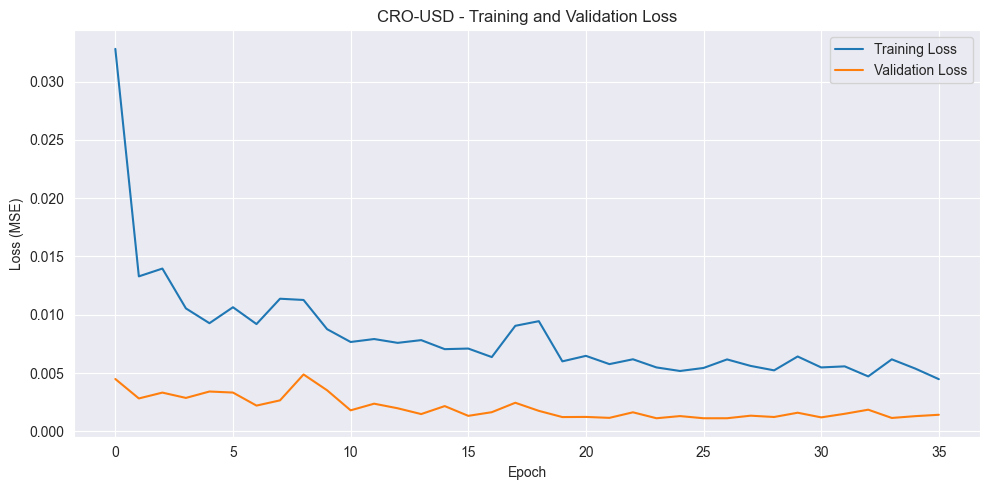

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1654 - val_loss: 0.0056
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0143 - val_loss: 0.0303
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - val_loss: 0.0075
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0056 - val_loss: 0.0063
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0112 - val_loss: 0.0056
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0082 - val_loss: 0.0046
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0078 - val_loss: 0.0098
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083 - val_loss: 0.0051
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0064 - val_loss: 0.0051
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0076 - val_loss: 0.0046
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0064 - val_loss: 0.0188
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

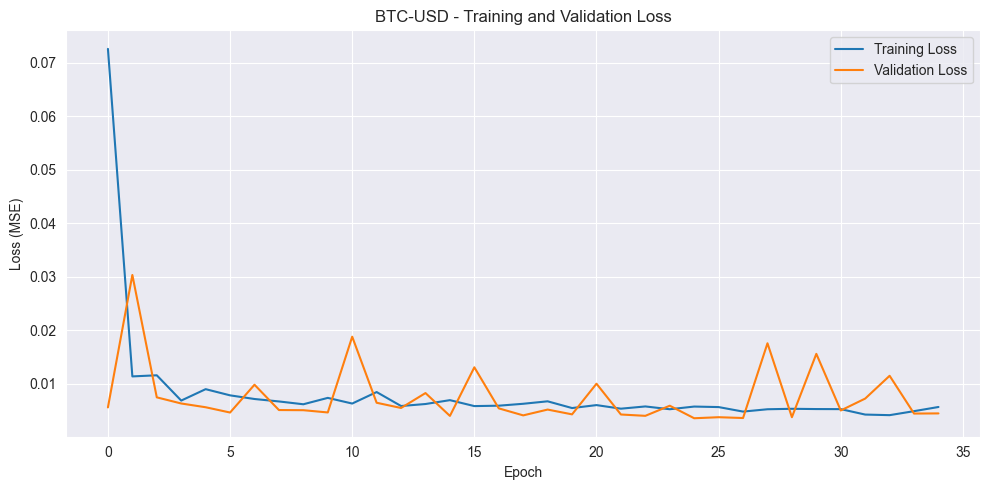

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1033 - val_loss: 0.0078
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0107 - val_loss: 0.0096
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - val_loss: 0.0062
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - val_loss: 0.0078
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0118 - val_loss: 0.0108
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - val_loss: 0.0062
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - val_loss: 0.0050
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0107 - val_loss: 0.0066
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - val_loss: 0.0047
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0097 - val_loss: 0.0072
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0090 - val_loss: 0.0052
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

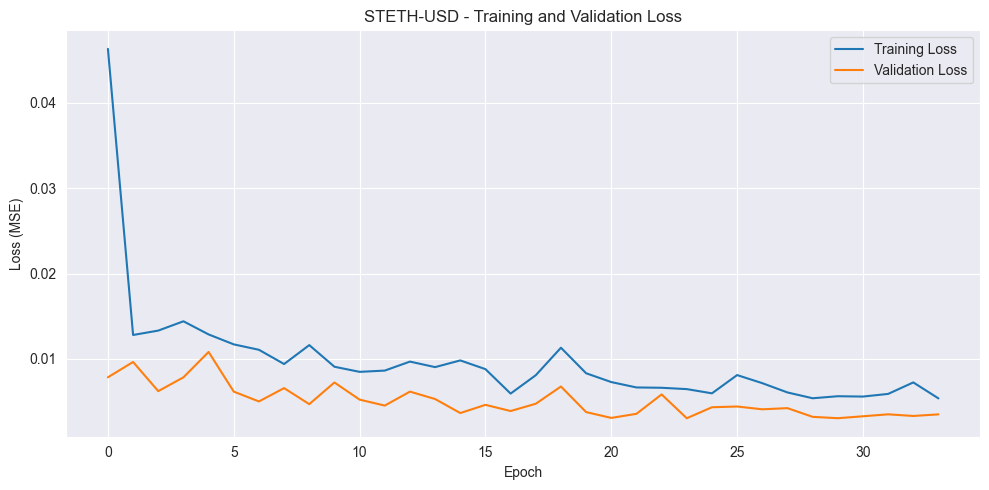

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0545 - val_loss: 0.0044
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - val_loss: 0.0099
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - val_loss: 0.0045
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - val_loss: 0.0054
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0076 - val_loss: 0.0065
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - val_loss: 0.0045
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0083 - val_loss: 0.0047
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0087 - val_loss: 0.0034
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0064 - val_loss: 0.0040
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0077 - val_loss: 0.0043
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - val_loss: 0.0037
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

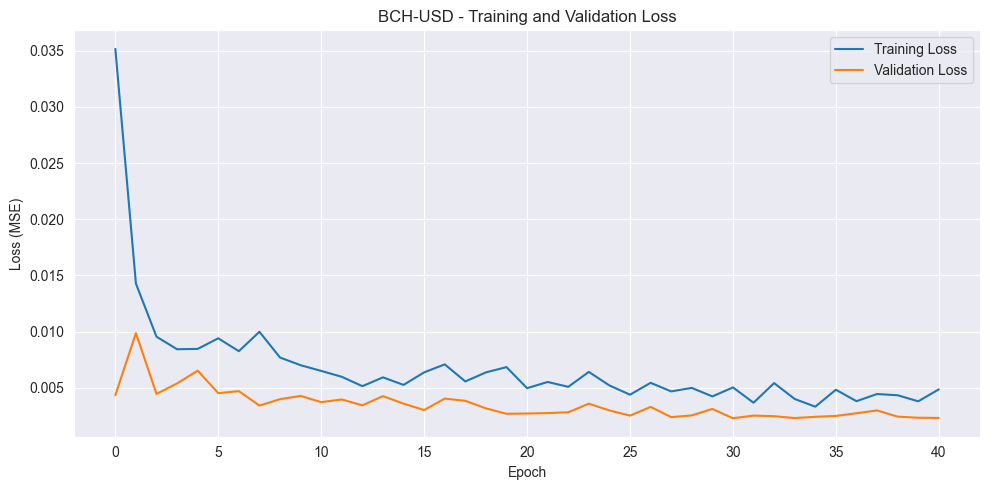

In [6]:
# Train LSTM models for each chosen currencies
df = data_collection()
chosen_currencies = ['CRO-USD', 'BTC-USD', 'STETH-USD', 'BCH-USD']
'''
for currency in chosen_currencies:
    train_lstm(df, currency, batch_size=8, seq_len=90)
'''

# improving low-performing models
# Optimized DNN layers, and changed Adam learning rate 0.001 -> 0.003
# Optimized by fitting mix-max scaler only on training set
train_lstm(df, 'CRO-USD', batch_size=8, seq_len=90)

train_lstm(df, 'BTC-USD', batch_size=8, seq_len=90)

train_lstm(df, 'STETH-USD', batch_size=8, seq_len=90)

train_lstm(df, 'BCH-USD', batch_size=8, seq_len=90)

In [7]:
# Load saved LSTM model

from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.optimizers import Adam

def load_lstm_model(df, ticker, seq_len=60):
    model_path = f"optimized_lstm_model/{ticker.lower().replace('-', '_')}_optimized_lstm_model.keras"
    history_path = f"optimized_lstm_model/{currency}_optimized_lstm_history.pkl"
    scaler_path = f'optimized_lstm_model/{currency}_optimized_lstm_scaler.pkl'
    
    # Load model WITHOUT loading optimizer state
    model = load_model(model_path, compile=False)

    # Recompile manually to avoid optimizer loading issues
    model.compile(optimizer=Adam(learning_rate=0.003), loss='mse')

    # Load scaler and history
    try:
        scaler = joblib.load(scaler_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"Scaler file not found at {scaler_path}")

    try:
        history = joblib.load(history_path)
    except FileNotFoundError:
        print("History file not found. Continuing without history.")
        history = None
        
    # Prepare price data
    prices = df[ticker].values.reshape(-1, 1)

    # Create sequences
    def create_sequences(data, seq_len):
        X, y = [], []
        for i in range(len(data) - seq_len):
            X.append(data[i:i+seq_len])
            y.append(data[i+seq_len])
        return np.array(X), np.array(y)

    X_full, y_full = create_sequences(prices, seq_len)

    # Split raw data
    total = len(X_full)
    train_end = int(0.7 * total)
    val_end = int(0.85 * total)

    X_train, y_train = X_full[:train_end], y_full[:train_end]
    X_val, y_val = X_full[train_end:val_end], y_full[train_end:val_end]
    X_test, y_test = X_full[val_end:], y_full[val_end:]
    
    # Apply loaded scaler (trained on training set only)
    X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)
    y_test_scaled = scaler.transform(y_test)
    
    # Predict - inverse transform predictions and true values
    test_loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_actual = scaler.inverse_transform(y_test_scaled)
    
    # Evaluation metrics
    rmse = np.sqrt(np.mean((y_pred - y_actual) ** 2))
    mae = np.mean(np.abs(y_pred - y_actual))
    mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
    
    print(f"{ticker} - Test MSE: {test_loss:.4f}")
    print(f"{ticker} - Test RMSE (USD): {rmse:.2f}")
    print(f"{ticker} - Test MAE  (USD): {mae:.2f}")
    print(f"{ticker} - Test MAPE (%): {mape:.2f}")
    
    '''
    # Inverse transform to get original scale
    y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    '''

    # Plot predicted vs actual values
    plt.figure(figsize=(12, 6))
    plt.plot(y_actual, label='Actual', color='black')
    plt.plot(y_pred, label='Predicted', color='red', alpha=0.7)
    plt.title(f"{ticker} - Actual vs Predicted Prices")
    plt.xlabel("Time Step")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # saves plots as a png file
    plt.savefig(r'C:\Users\Senju\Downloads\optimized_LSTM_actual_vs_predicted_' + ticker + '.png')
    plt.show()

[*********************100%***********************]  50 of 50 completed

6 Failed downloads:
['BSC-USD-USD', 'SUSDS-USD']: YFTzMissingError('possibly delisted; no timezone found')
['BUIDL-USD', 'TAO-USD', 'USDS-USD', 'PEPE-USD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-08 -> 2025-05-08)')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
CRO-USD - Test MSE: 0.0009
CRO-USD - Test RMSE (USD): 0.00
CRO-USD - Test MAE  (USD): 0.00
CRO-USD - Test MAPE (%): 4.06


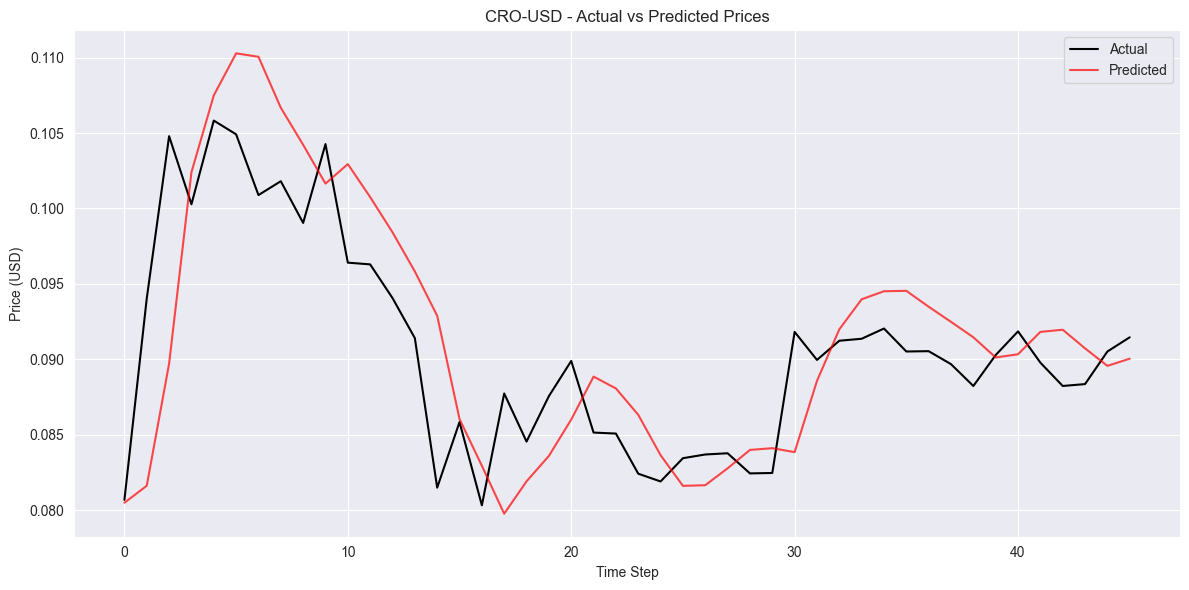

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
BTC-USD - Test MSE: 0.0027
BTC-USD - Test RMSE (USD): 2828.64
BTC-USD - Test MAE  (USD): 2151.07
BTC-USD - Test MAPE (%): 2.48


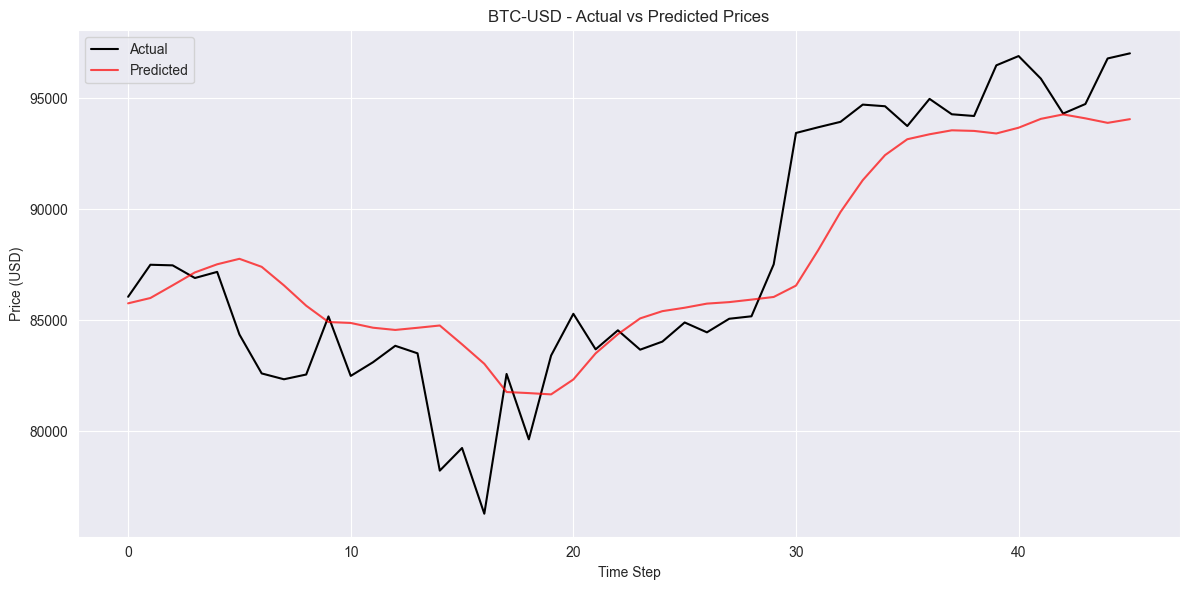

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
STETH-USD - Test MSE: 0.0014
STETH-USD - Test RMSE (USD): 76.49
STETH-USD - Test MAE  (USD): 52.10
STETH-USD - Test MAPE (%): 3.03


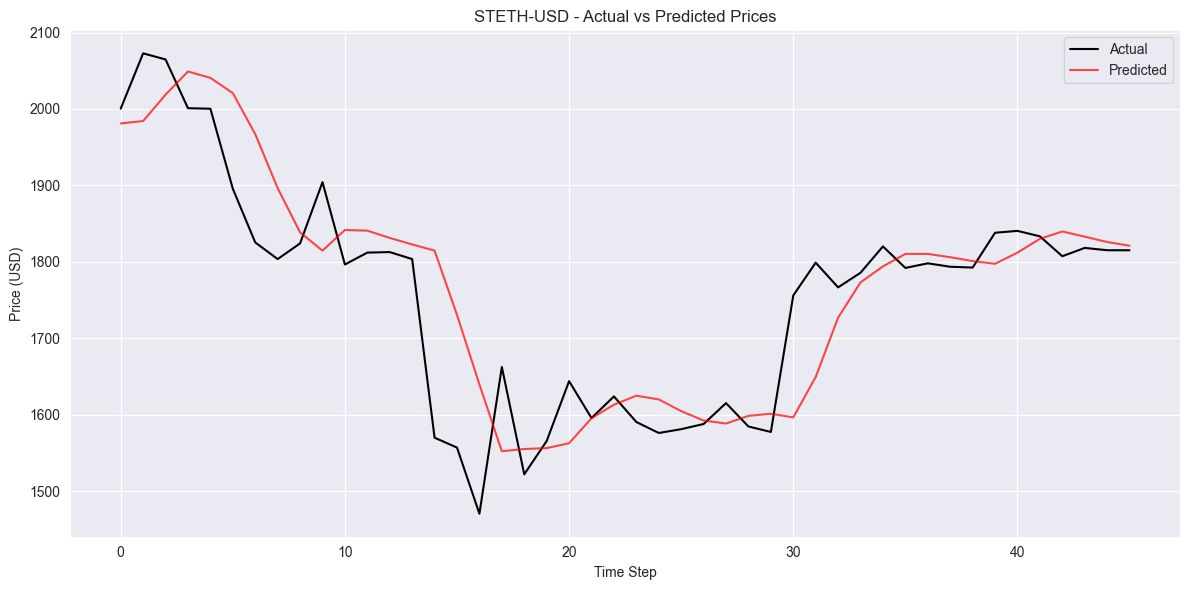

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
BCH-USD - Test MSE: 0.0018
BCH-USD - Test RMSE (USD): 13.94
BCH-USD - Test MAE  (USD): 10.86
BCH-USD - Test MAPE (%): 3.29


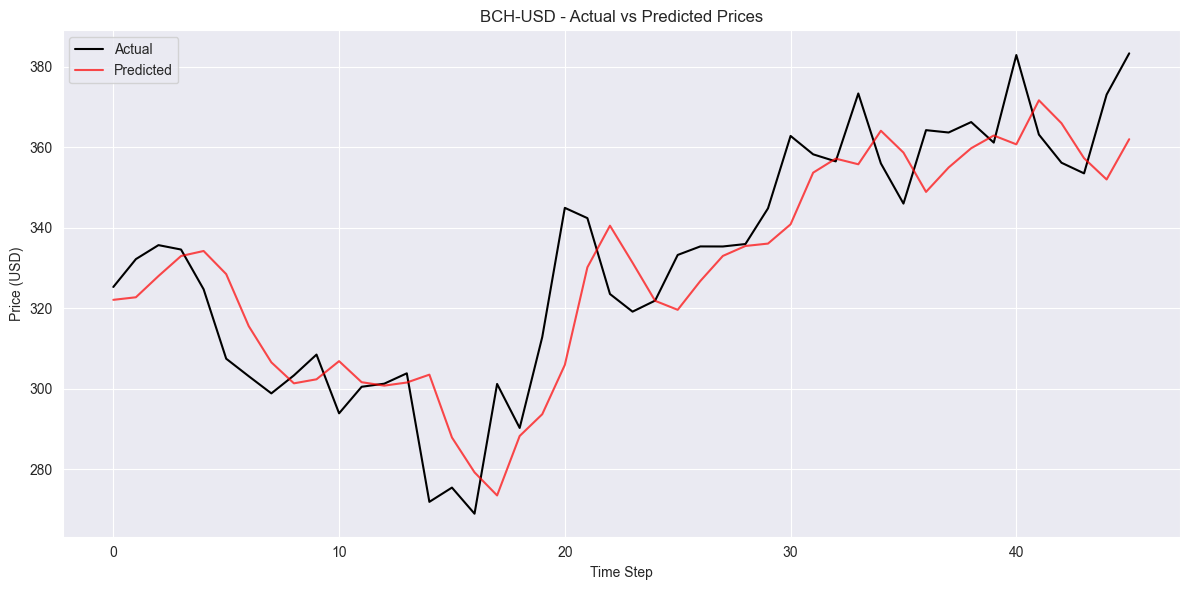

In [8]:
# Load and evaluate LSTM models for each chosen currencies
df = data_collection()
chosen_currencies = ['CRO-USD', 'BTC-USD', 'STETH-USD', 'BCH-USD']
for currency in chosen_currencies:
    load_lstm_model(df, currency, seq_len=60)

In [ ]:
# Facebook Prophet

In [109]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

def train_prophet(df, ticker):
    # Prepare the data
    df = df.reset_index()
    df['ds'] = pd.to_datetime(df['Date'])
    df['y'] = df[ticker]
    currency_df = df[['ds', 'y']]
    
    # Split the data - 70:15:15
    total_len = len(df)
    train_end = int(total_len * 0.70)
    val_end = int(total_len * 0.85)
    
    train_df = df.iloc[:train_end]
    val_df = df.iloc[train_end:val_end]
    test_df = df.iloc[val_end:]
    
    # Initialize model with tuned parameters
    model = Prophet(
        daily_seasonality=False,        # Since I'm using closing prices
        weekly_seasonality=True,       # Crypto is 24/7 — weekly patterns matter
        yearly_seasonality=True,       # Since I have one year amount of data; Some broad seasonal shifts over months
        changepoint_prior_scale=0.05,   # default is 0.05, higher = more flexibility, lower = reduces trend overfitting
        seasonality_mode='additive',
        changepoint_range=1.0,  # use entire training range
    )
    model.fit(train_df)
    
    # Make future dataframe for validation and testing period
    future_val = val_df[['ds']].copy()
    future_test = test_df[['ds']].copy()
    
    # Forecast
    forecast_val = model.predict(future_val)
    forecast_test = model.predict(future_test)
    
    # Evaluation
    def evaluate(y_true, y_pred, label):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        print(f"{ticker} {label} - MSE: {mse:.4f}, RMSE (USD): {rmse:.4f}, MAE (USD): {mae:.4f}, MAPE (%): {mape:.2f}%")
    
    y_true_val = val_df['y'].values
    y_pred_val = forecast_val['yhat'].values
    evaluate(y_true_val, y_pred_val, "Validation")
    
    y_true_test = test_df['y'].values
    y_pred_test = forecast_test['yhat'].values
    evaluate(y_true_test, y_pred_test, "Test")
    
    # Plot actual vs prediction
    plt.figure(figsize=(12,5))
    plt.plot(test_df['ds'], y_true_test, label='Actual', color='black')
    plt.plot(test_df['ds'], y_pred_test, label='Predicted', color='blue')
    plt.title(f"{ticker} Prophet Forecast vs Actual (Test Set)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # saves plots as a png file
    plt.savefig(r'C:\Users\Senju\Downloads\Prophet_actual_vs_predicted_' + ticker + '.png')
    plt.show()
    
    # Save model
    joblib.dump(model, f"{ticker.lower().replace('-', '_')}_prophet_model.pkl")
        
    return model

In [ ]:
df = data_collection()
chosen_currencies = ['CRO-USD', 'BTC-USD', 'STETH-USD', 'BCH-USD']
'''
for currency in chosen_currencies:
    model = train_prophet(df, currency)
'''

In [34]:
# Load and evaluate prophet model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet

def load_prophet(df, ticker):
    # Load model
    model_path = f"{ticker.lower().replace('-', '_')}_prophet_model.pkl"
    model = joblib.load(model_path)

    # Prepare data
    df = df.reset_index()
    df['ds'] = pd.to_datetime(df['Date'])
    df['y'] = df[ticker]
    df = df[['ds', 'y']]

    # Split
    total_len = len(df)
    train_end = int(total_len * 0.70)
    val_end = int(total_len * 0.85)

    train_df = df.iloc[:train_end]
    val_df = df.iloc[train_end:val_end]
    test_df = df.iloc[val_end:]

    # Predict
    forecast_val = model.predict(val_df[['ds']])
    forecast_test = model.predict(test_df[['ds']])

    # Evaluation function
    def evaluate(y_true, y_pred, label):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        print(f"{ticker} {label} - MSE: {mse:.4f}, RMSE (USD): {rmse:.4f}, MAE (USD): {mae:.4f}, MAPE (%): {mape:.2f}%")

    # Evaluate
    evaluate(val_df['y'].values, forecast_val['yhat'].values, "Validation")
    evaluate(test_df['y'].values, forecast_test['yhat'].values, "Test")

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(test_df['ds'], test_df['y'], label='Actual', color='black')
    plt.plot(test_df['ds'], forecast_test['yhat'], label='Predicted', color='blue')
    plt.title(f"{ticker} Prophet Forecast vs Actual (Test Set)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  50 of 50 completed

6 Failed downloads:
['PEPE-USD', 'TAO-USD', 'BUIDL-USD', 'USDS-USD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-08 -> 2025-05-08)')
['SUSDS-USD', 'BSC-USD-USD']: YFTzMissingError('possibly delisted; no timezone found')


CRO-USD Validation - MSE: 0.0019, RMSE (USD): 0.0439, MAE (USD): 0.0389, MAPE (%): 45.20%
CRO-USD Test - MSE: 0.0030, RMSE (USD): 0.0545, MAE (USD): 0.0536, MAPE (%): 61.25%


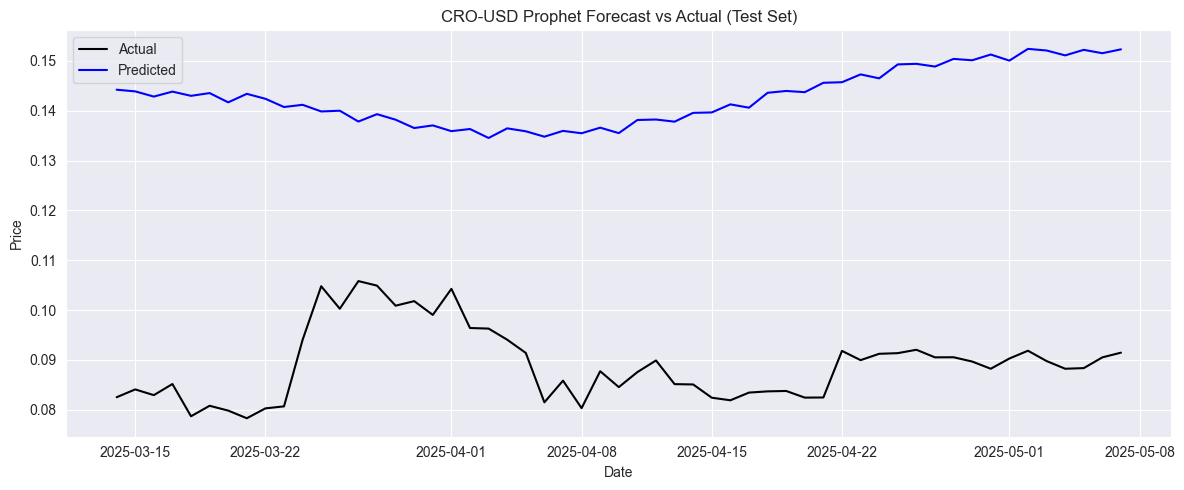

BTC-USD Validation - MSE: 377875258.0123, RMSE (USD): 19439.0138, MAE (USD): 15505.6774, MAPE (%): 16.13%
BTC-USD Test - MSE: 787119701.6866, RMSE (USD): 28055.6536, MAE (USD): 22985.6589, MAPE (%): 27.14%


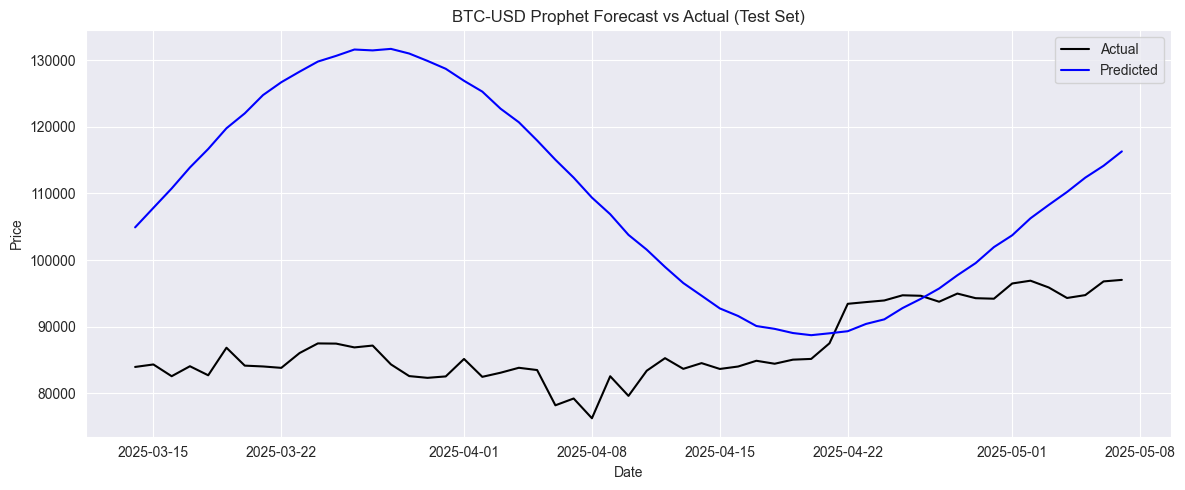

STETH-USD Validation - MSE: 19690380.5015, RMSE (USD): 4437.3844, MAE (USD): 3644.3284, MAPE (%): 141.66%
STETH-USD Test - MSE: 44411175.2445, RMSE (USD): 6664.1710, MAE (USD): 5775.1681, MAPE (%): 339.82%


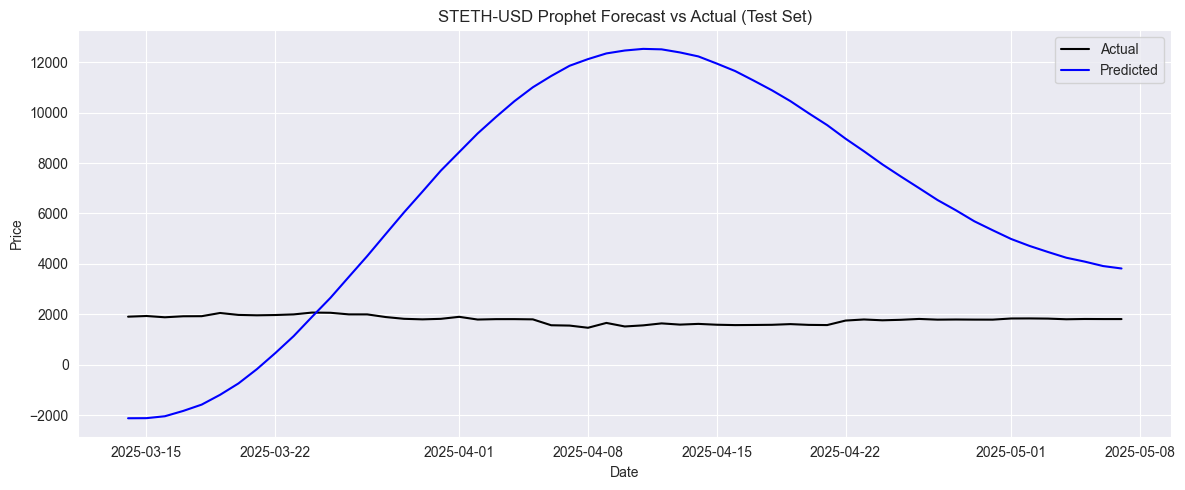

BCH-USD Validation - MSE: 12662.0907, RMSE (USD): 112.5260, MAE (USD): 92.4212, MAPE (%): 28.23%
BCH-USD Test - MSE: 16172.2584, RMSE (USD): 127.1702, MAE (USD): 108.1230, MAPE (%): 34.42%


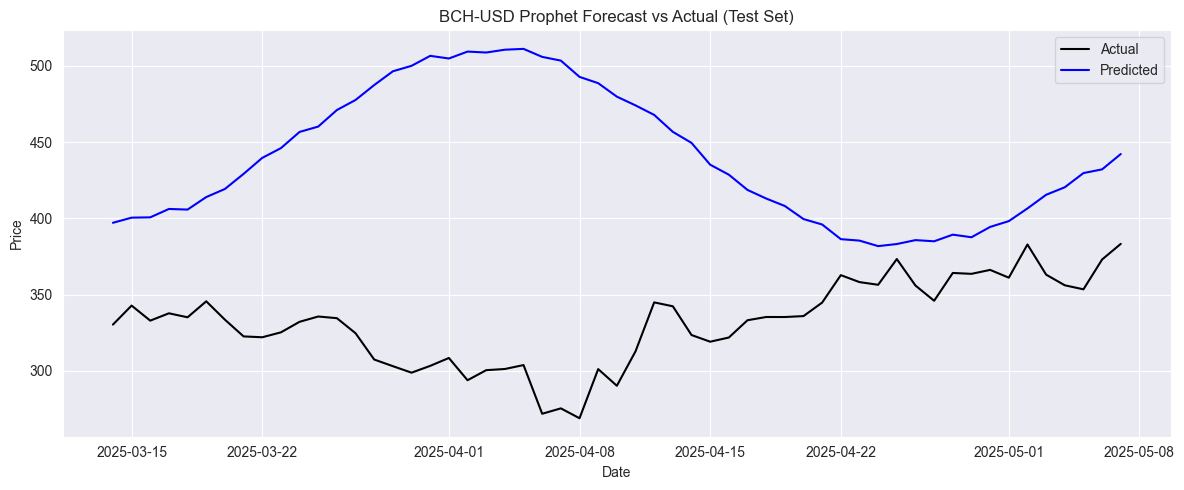

In [35]:
df = data_collection()
chosen_currencies = ['CRO-USD', 'BTC-USD', 'STETH-USD', 'BCH-USD']
for currency in chosen_currencies:
    load_prophet(df, currency)

In [ ]:
# XGBoost

In [ ]:
!pip uninstall xgboost -y
!pip install xgboost==1.7.6

In [28]:
# Train XGBoost model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from math import sqrt

def train_xgb(df, ticker):
    # Extract Ticker column
    # currency_data = df[ticker].copy()
    currency_data = df[ticker].diff() # For STETH-USD
    
    # Create lag features for time series prediction
    def create_lag_features(data, lags=5):
        df_lag = pd.DataFrame({'y': data})
        for lag in lags:
            df_lag[f'lag_{lag}'] = df_lag['y'].shift(lag)
        df_lag.dropna(inplace=True)
        return df_lag
    
    lags = [1, 2, 3, 4, 6]
    data_lagged = create_lag_features(currency_data, lags=lags)
    
    # Split into train, validation, and test (70:15:15)
    n = len(data_lagged)
    train_end = int(n * 0.7)
    val_end = int(n * 0.85)
    
    train = data_lagged[:train_end]
    val = data_lagged[train_end:val_end]
    test = data_lagged[val_end:]
    
    X_train, y_train = train.drop('y', axis=1), train['y']
    X_val, y_val = val.drop('y', axis=1), val['y']
    X_test, y_test = test.drop('y', axis=1), test['y']
    
    # Train XGBoost model
    model = XGBRegressor(
        n_estimators=100, 
        learning_rate=0.1, 
        objective='reg:squarederror', 
        early_stopping_rounds=10
    )
    
    model.fit(
        X_train, y_train, 
        eval_set=[(X_val, y_val)], 
        verbose=False
    )
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluation Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    # mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    ### ONLY when using df[ticker].diff()
    # Reconstruct predicted prices
    start_price = df[ticker].iloc[train_end + len(lags)]
    predicted_prices = start_price + np.cumsum(y_pred)
    actual_prices = start_price + np.cumsum(y_test.values)
    mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100
    ###
    
    print(f"{ticker} Evaluation Metrics (XGBoost):")
    print(f" - MSE:  {mse:.4f}")
    print(f" - RMSE (USD): {rmse:.4f}")
    print(f" - MAE (USD):  {mae:.4f}")
    print(f" - MAPE (%): {mape:.2f}%")
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(12, 6))
    # plt.plot(y_test.values, label=f'Actual {ticker}')
    # plt.plot(y_pred, label=f'Predicted {ticker}')
    ### ONLY when using df[ticker].diff()
    plt.plot(actual_prices, label=f'Actual {ticker}')
    plt.plot(predicted_prices, label=f'Predicted {ticker}')
    ###
    plt.title(f"{ticker}: Actual vs Predicted")
    plt.xlabel("Time Index")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # saves plots as a png file
    plt.savefig(r'C:\Users\Senju\Downloads\XGB_actual_vs_predicted_' + ticker + '.png')
    plt.show()
    
    # Save model
    model.save_model(f"{ticker.lower().replace('-', '_')}_xgb_model.bin")
    
    return model

In [ ]:
df = data_collection()
chosen_currencies = ['CRO-USD', 'BTC-USD', 'STETH-USD', 'BCH-USD']
'''
for currency in chosen_currencies:
    model = train_xgb(df, currency)
'''

# improve low-performing models
# model = train_xgb(df, 'STETH-USD')

In [30]:
# Load and evaluate XGBoost model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from math import sqrt

def load_xgb(df, ticker, use_diff=False):
    model = XGBRegressor()
    model.load_model(f"{ticker.lower().replace('-', '_')}_xgb_model.bin")
    
    # Differencing data as done in training (if use_diff=True)
    series = df[ticker].diff() if use_diff else df[ticker].copy()

    # Create lag features exactly like in training
    def create_lag_features(data, lags=5):
        df_lag = pd.DataFrame({'y': data})
        for lag in lags:
            df_lag[f'lag_{lag}'] = df_lag['y'].shift(lag)
        df_lag.dropna(inplace=True)  # Ensure no missing values
        return df_lag

    lags = [1, 2, 3, 4, 6]  # Same lags as in training
    data_lagged = create_lag_features(series, lags)

    n = len(data_lagged)
    
    # Ensure the same splitting logic as in training
    train_end = int(n * 0.7)  # 70% for training
    test_start = int(n * 0.85)  # 85% for test (same as in training code)

    # Ensure that the test set is the same (from 85% to 100%)
    test = data_lagged[test_start:]
    X_test, y_test = test.drop('y', axis=1), test['y']
    
    # Make predictions
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Reconstruct actual and predicted prices based on differenced data (if use_diff=True)
    if use_diff:
        # Correct start price based on test start + lag
        start_price = df[ticker].iloc[train_end + len(lags)]  # Correct start price based on lag
        predicted_prices = start_price + np.cumsum(y_pred)  # Cumulative sum for predicted prices
        actual_prices = start_price + np.cumsum(y_test.values)  # Actual prices
        mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100
    else:
        predicted_prices = y_pred
        actual_prices = y_test.values
        mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

    print(f"{ticker} Evaluation Metrics (XGBoost):")
    print(f" - MSE:  {mse:.4f}")
    print(f" - RMSE (USD): {rmse:.4f}")
    print(f" - MAE (USD):  {mae:.4f}")
    print(f" - MAPE (%): {mape:.2f}%")

    # Plot Actual vs Predicted
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label=f'Actual {ticker}')
    plt.plot(predicted_prices, label=f'Predicted {ticker}')
    plt.title(f"{ticker}: Actual vs Predicted")
    plt.xlabel("Time Index")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  50 of 50 completed

6 Failed downloads:
['PEPE-USD', 'TAO-USD', 'BUIDL-USD', 'USDS-USD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-08 -> 2025-05-08)')
['SUSDS-USD', 'BSC-USD-USD']: YFTzMissingError('possibly delisted; no timezone found')


CRO-USD Evaluation Metrics (XGBoost):
 - MSE:  0.0000
 - RMSE (USD): 0.0046
 - MAE (USD):  0.0033
 - MAPE (%): 3.65%


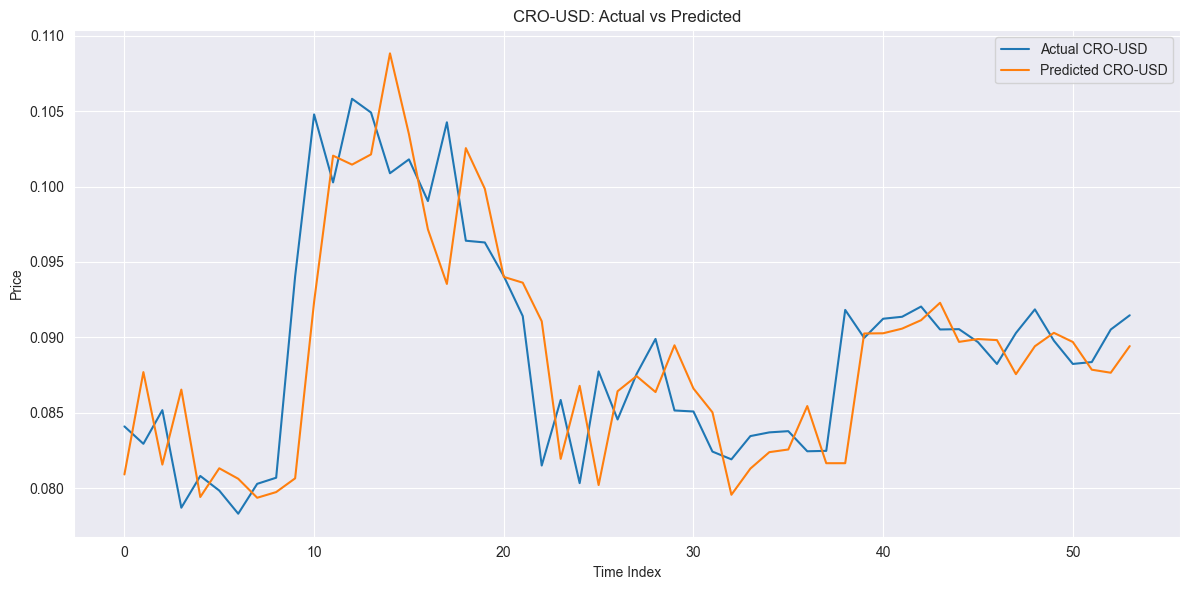

BTC-USD Evaluation Metrics (XGBoost):
 - MSE:  14888566.2865
 - RMSE (USD): 3858.5705
 - MAE (USD):  3076.6092
 - MAPE (%): 3.66%


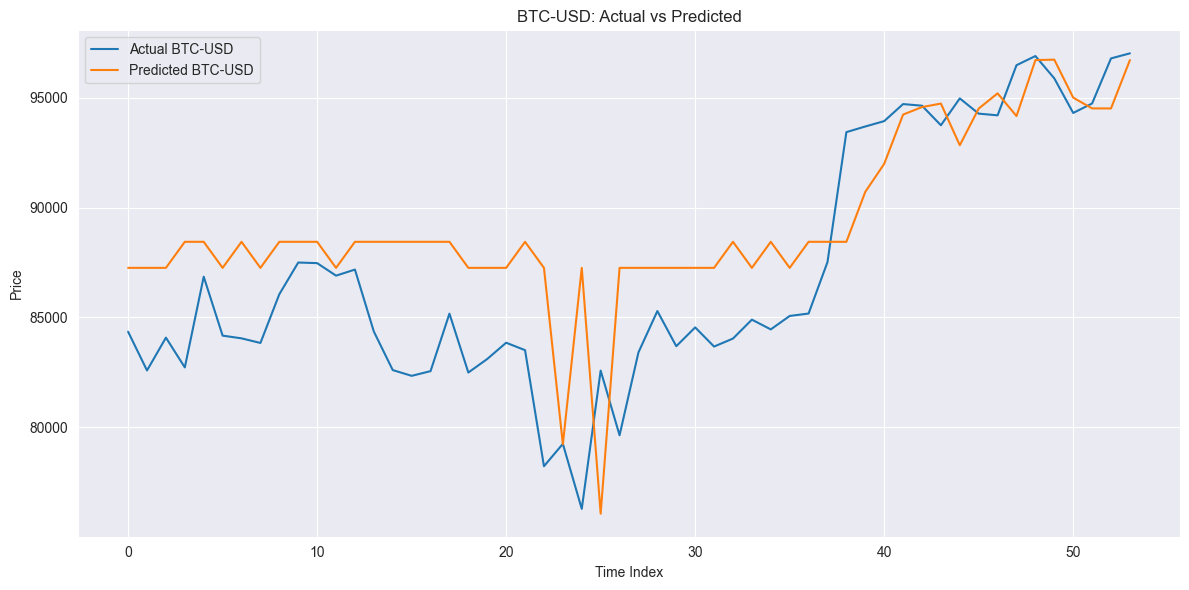

BCH-USD Evaluation Metrics (XGBoost):
 - MSE:  209.2239
 - RMSE (USD): 14.4646
 - MAE (USD):  10.7393
 - MAPE (%): 3.28%


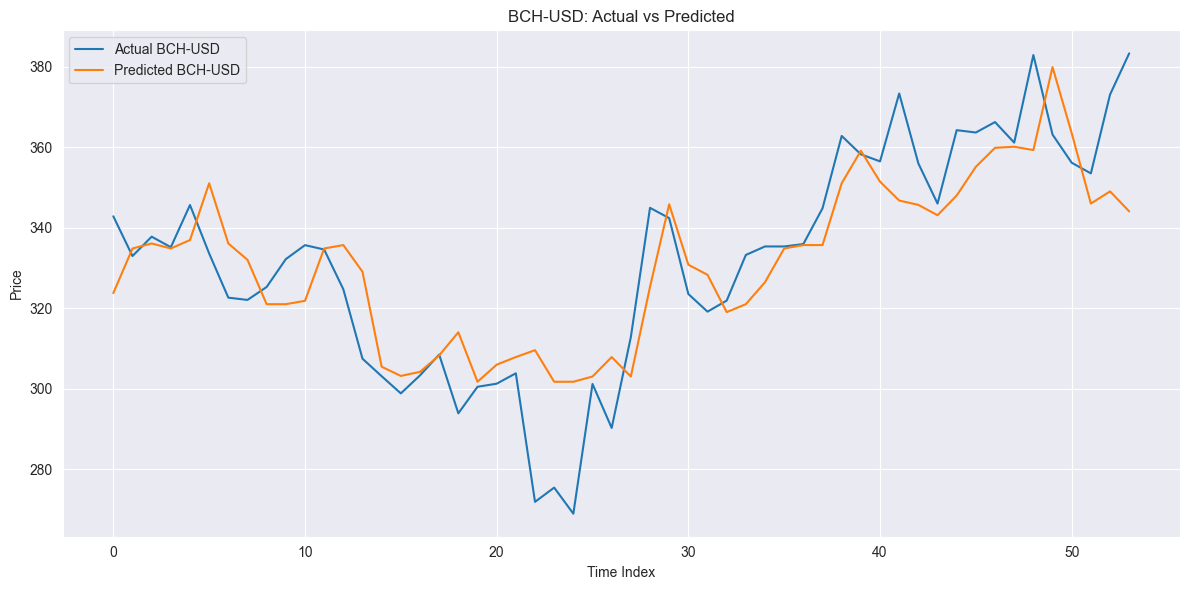

STETH-USD Evaluation Metrics (XGBoost):
 - MSE:  4887.0060
 - RMSE (USD): 69.9071
 - MAE (USD):  48.2921
 - MAPE (%): 7.84%


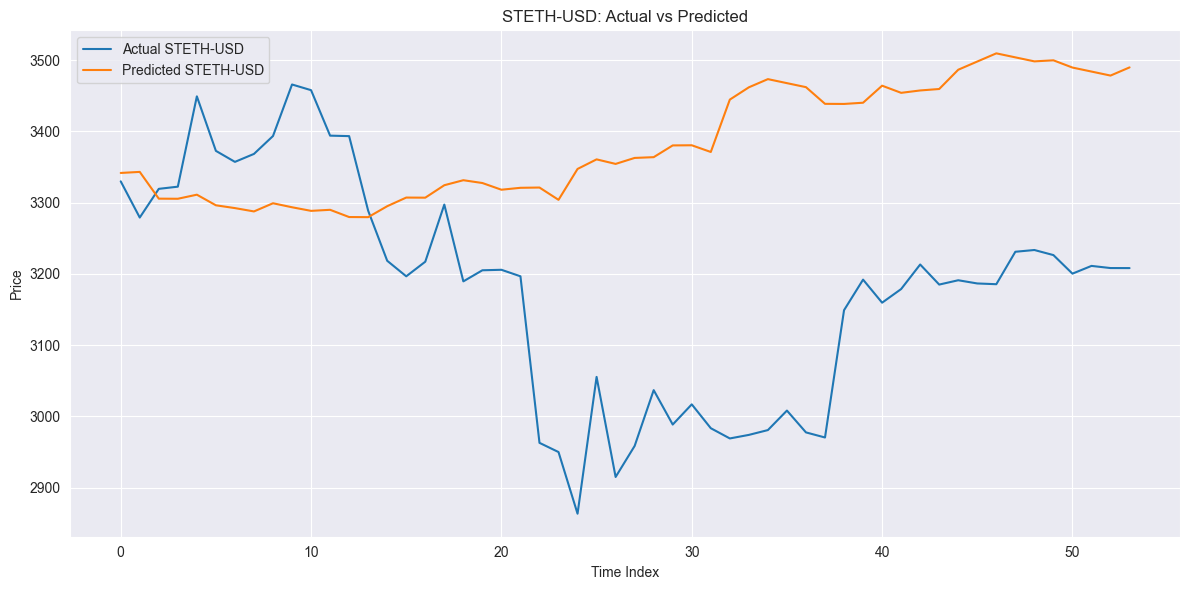

In [32]:
df = data_collection()
chosen_currencies = ['CRO-USD', 'BTC-USD', 'BCH-USD']
for currency in chosen_currencies:
    load_xgb(df, currency, use_diff=False)
load_xgb(df, 'STETH-USD', use_diff=True)

In [ ]:
# ARIMA

In [ ]:
!pip uninstall pmdarima -y
!pip install pmdarima==2.0.4
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.3.2

In [36]:
# Train ARIMA model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
import joblib

def train_arima(df, ticker):
    # Select ticker column
    currency_series = df[ticker].dropna()
    
    # Split data: 70% train, 15% test, 15% validation
    total_len = len(currency_series)
    train_end = int(total_len * 0.70)
    test_end = int(total_len * 0.85)
    
    train = currency_series[:train_end]
    test = currency_series[train_end:test_end]
    val = currency_series[test_end:]
    
    # Fit ARIMA model with auto_arima for best parameters
    model = auto_arima(
        train,
        seasonal=False,
        #m=7,  # Try 7 for weekly seasonality, or 30 for monthly
        start_P=0,
        start_Q=0,
        max_P=5,
        max_Q=5,
        d=1, # non-seasonal differencing
        D=0, # seasonal differencing
        stepwise=True,
        trace=True,
    )
    
    # Forecast the test and validation sets
    n_test_val = len(test) + len(val)
    forecast = model.predict(n_periods=n_test_val)
    forecast_index = currency_series.index[train_end:]
    forecast_series = pd.Series(forecast, index=forecast_index)
    
    # Combine actual and predicted
    actual = pd.concat([test, val])
    
    # Evaluation metrics
    mse = mean_squared_error(actual, forecast_series)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, forecast_series)
    mape = np.mean(np.abs((actual - forecast_series) / actual.replace(0, np.nan))) * 100
    
    print(f"{ticker} Evaluation Metrics:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE (USD): {rmse:.2f}")
    print(f"MAE (USD): {mae:.2f}")
    print(f"MAPE (%): {mape:.2f}%")
    
    # Plot actual vs prediction
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual.values, label="Actual")
    plt.plot(forecast_series.index, forecast_series.values, label="Predict", linestyle="--")
    plt.title(f"{ticker}: Actual vs Predicted values (ARIMA)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # saves plots as a png file
    plt.savefig(r'C:\Users\Senju\Downloads\ARIMA_actual_vs_predicted_' + ticker + '.png')
    plt.show()
    
    # Save model
    joblib.dump(model, f"{ticker.lower().replace('-', '_')}_arima_model.pkl")
    
    return model

In [ ]:
df = data_collection()
chosen_currencies = ['CRO-USD', 'BTC-USD', 'STETH-USD', 'BCH-USD']
'''
for currency in chosen_currencies:
    model = train_arima(df, currency)
'''

In [38]:
# Load and evaluate saved ARIMA models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error

def load_arima(df, ticker):
    currency_series = df[ticker].dropna()
    
    # Split data: 70% train, 15% test, 15% validation
    total_len = len(currency_series)
    train_end = int(total_len * 0.70)
    test_end = int(total_len * 0.85)
    
    train = currency_series[:train_end]
    test = currency_series[train_end:test_end]
    val = currency_series[test_end:]
    
    actual = pd.concat([test, val])
    
    model = joblib.load(f"{ticker.lower().replace('-', '_')}_arima_model.pkl")
    
    n_periods = len(test) + len(val)
    forecast = model.predict(n_periods=n_periods)
    
    forecast_index = currency_series.index[train_end:]
    forecast_series = pd.Series(forecast, index=forecast_index)
    
    mse = mean_squared_error(actual, forecast_series)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, forecast_series)
    mape = np.mean(np.abs((actual - forecast_series) / actual.replace(0, np.nan))) * 100
    
    print(f"{ticker} Evaluation Metrics:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label="Actual")
    plt.plot(forecast_series.index, forecast_series, label="Predicted", linestyle="--")
    plt.title(f"{ticker}: Actual vs Predicted (ARIMA)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  50 of 50 completed

6 Failed downloads:
['SUSDS-USD', 'BSC-USD-USD']: YFTzMissingError('possibly delisted; no timezone found')
['BUIDL-USD', 'USDS-USD', 'PEPE-USD', 'TAO-USD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-08 -> 2025-05-08)')


CRO-USD Evaluation Metrics:
MSE: 0.00
RMSE: 0.06
MAE: 0.05
MAPE: 60.20%


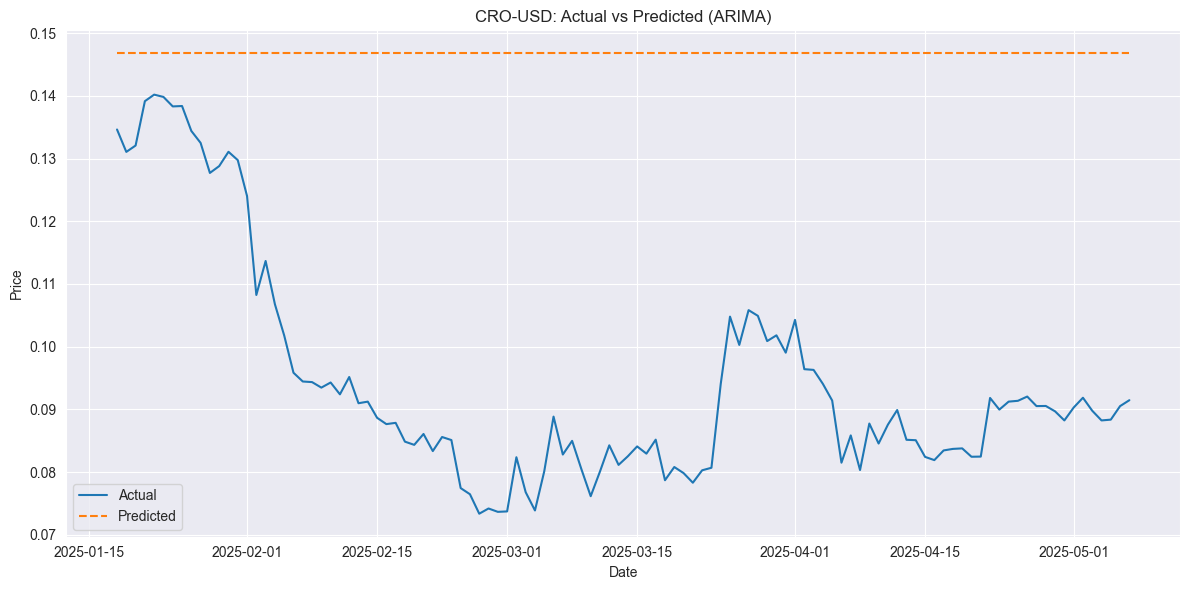

BTC-USD Evaluation Metrics:
MSE: 653439803.05
RMSE: 25562.47
MAE: 22855.16
MAPE: 26.22%


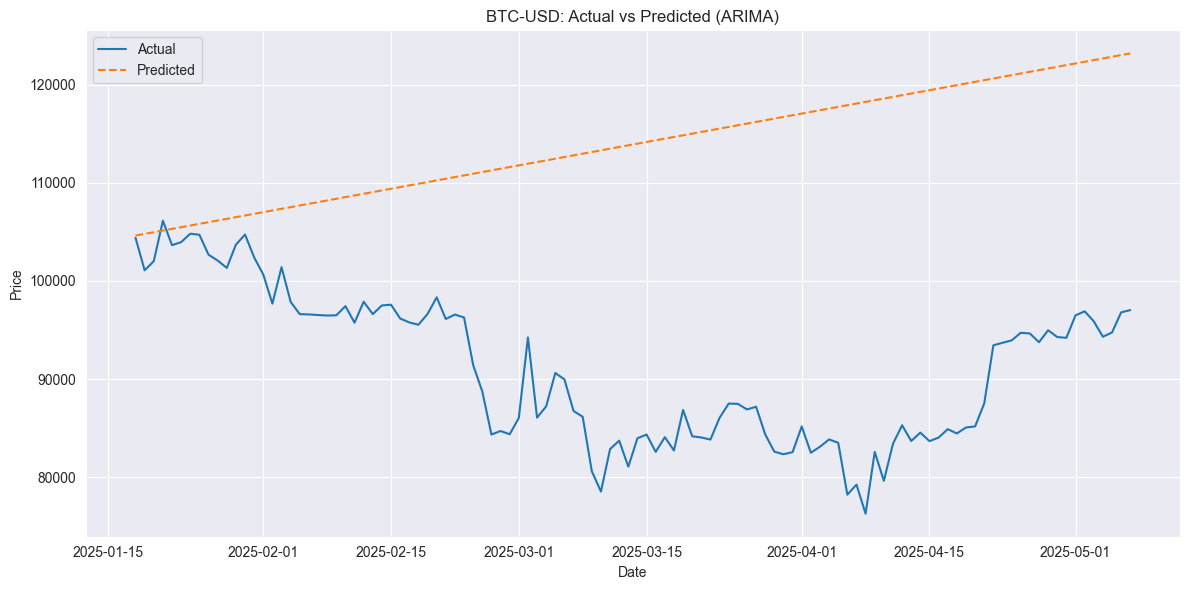

STETH-USD Evaluation Metrics:
MSE: 1838748.66
RMSE: 1356.00
MAE: 1239.64
MAPE: 64.45%


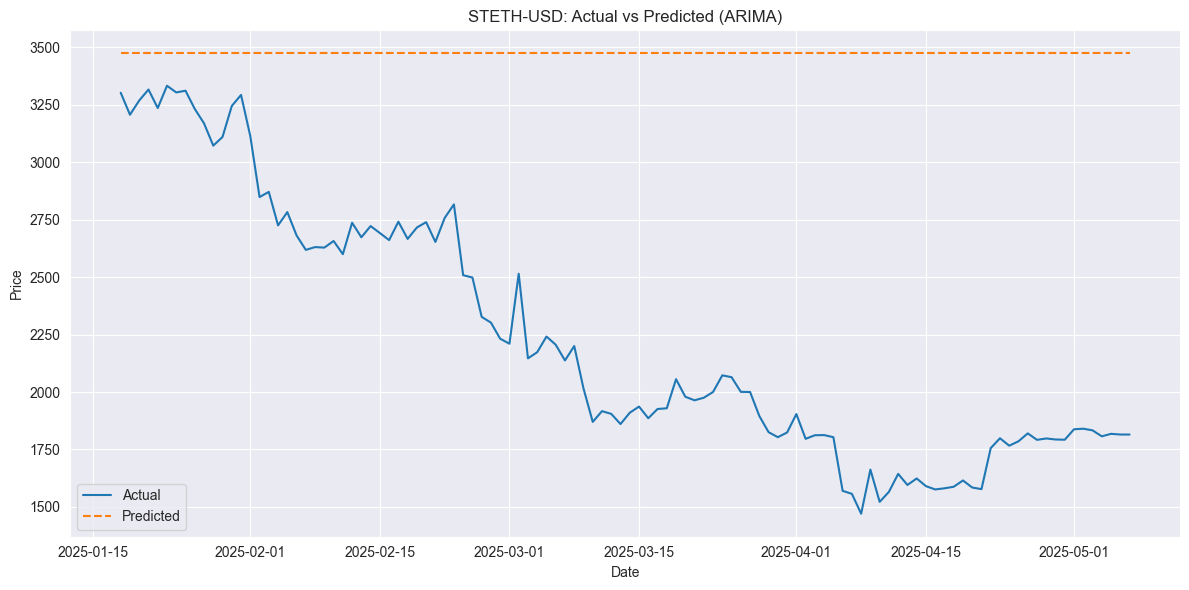

BCH-USD Evaluation Metrics:
MSE: 22579.20
RMSE: 150.26
MAE: 144.23
MAPE: 43.71%


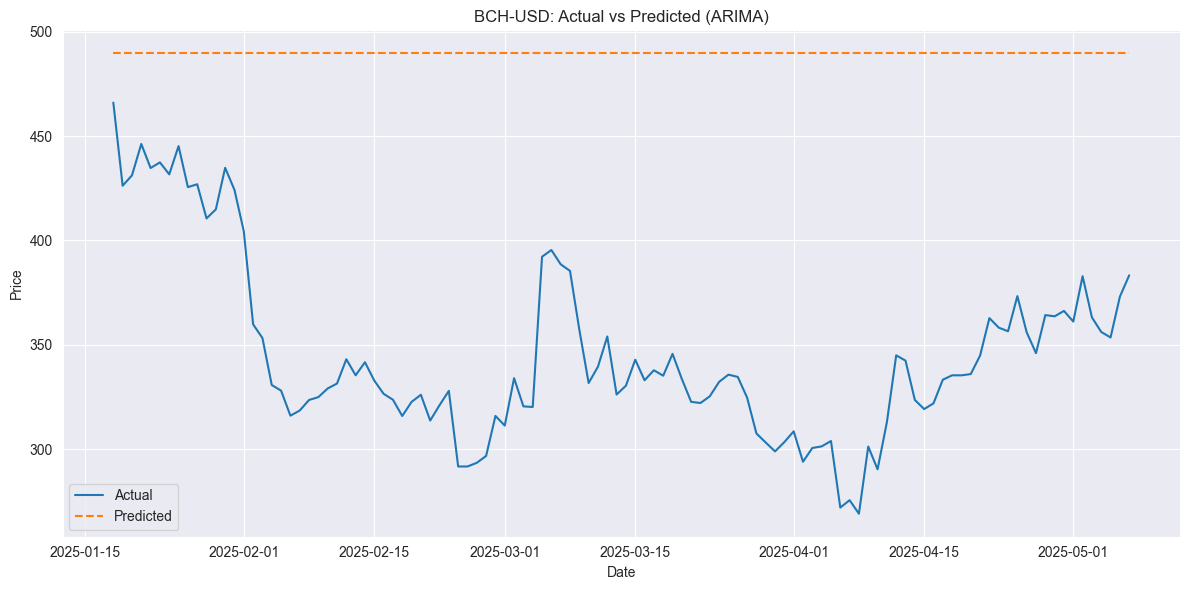

In [39]:
df = data_collection()
chosen_currencies = ['CRO-USD', 'BTC-USD', 'STETH-USD', 'BCH-USD']
for currency in chosen_currencies:
    load_arima(df, currency)

In [ ]:
# Min-Max scaling commonly recommended for K-Means clustering (before dimension reduction), also StandardScaler is not necessary because the dataset does not include negative values that I want to preserve the range of

# AE >> PCA >> LDA before clustering - non-linearity was detected in the dataset (PCA can only handle linearity), which makes sense since cryptocurrency market is highly volatile. AE also handles unsupervised learning well (more than PCA). LDA also requires class labels / a target variable, which we do not have

# encoding_dim = 4 # reduce from 365 to 4 features - spits error if smaller than number of clusters e.g., 2

# However, the feature extraction technique should be different per model e.g., PCA - Prophet and ARIMA, AE - LSTM and XGBoost

# K-Means clustering because the cluster group can be specified -> compare with other cluster techniques in the REPORT

# Create Pearson correlation heatmaps -> Pearson because the data is not ordinal (otherwise it would be Spearman); explain the process

# EDA - create histogram to look at the skewness, kurtosis, mean, median, mode, etc. Line plot / scatter plot, density plot for comparison and visualization

# Talk about which models to use and why - LSTM, Prophet, XGBoost, and ARIMA

# Data splitting 70:15:15 train, test, and validation set

# Scaled (Min-Max) and non-dimensionally reduced data - LSTM

# Non-scaled and non-dimensionally reduced data - Prophet, XGBoost, ARIMA

# Mistake in project requirement - In the requirement, it is mentioned that we need to use tickers as rows and timestamps as columns. Which contradicts with the requirements of all the following models - therefore, we are using timestamps as rows, and tickers as columns

# LSTM -> significantly improved when increased seq_length from 60 and 90, optimized the DNN layers, and changed Adam optimizer learning rate from 0.001 to 0.003

# Dropout layer helps with over-fitting, and activation function is not needed in the final dense layer, because I'm predicting continuous numerical values (like prices), so the output should be unbounded -> no need for activation function

# Prophet -> very much struggled capturing the volatility of the cryptocurrency market. Tuned as much as possible for the optimal results (CHECK parameter settings).

# XGBoost -> Unlike ARIMA or LSTM, XGBoost is not time-aware. Therefore, needs lag features. Lag features changed from lags = [1, 2, 3, 4, 5] to lags = [1, 2, 3, 4, 6] for optimal performance

# For XGB, STETH-USD wasn't learning anything. So we used daily price differences instead of price itself -> df[ticker].diff(). This improved the model significantly

# ARIMA -> No hope for ARIMA, it cannot capture non-linearity and volatility of cryptomarket no matter how the parameter p,d,q is tuned (I also tried with specified seasonality and auto_arima for best parameter, no use)

# Validation set was essential to avoid over-fitting and most importantly, early stopping

# Line plot to compare prediction and actual value (supervised learning)

# Predict unseen data - unsupervised learning

# Eval metrics: MSE, RMSE (USD), MAE (USD), and MAPE (%) - Justify in REPORT

# Look through the brief, slides, and criteria to see if there's any topic that can be applied here and talked about here

In [16]:
# Buy-sell signals

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import joblib
from prophet import Prophet
from keras.models import load_model
import xgboost as xgb
import pmdarima as pm

def forecast_future_price(model, scaler, data, seq_len=60, future_day=7):
    if isinstance(model, Prophet):
        return forecast_prophet(model, data, future_day)
    elif isinstance(model, xgb.Booster):
        return forecast_xgboost(model, data, lags=[1, 2, 3, 4, 6], future_day=future_day)
    elif isinstance(model, pm.arima.arima.ARIMA) or hasattr(model, 'predict_in_sample'):
        return forecast_arima(model, data, future_day)
    elif hasattr(model, 'predict'):
        return forecast_lstm(model, scaler, data, seq_len, future_day)
    else:
        raise ValueError("Unsupported model type. Must be one of: LSTM, Prophet, XGBoost, ARIMA.")

def forecast_lstm(model, scaler, data, seq_len=60, future_day=7):
    if len(data) < seq_len:
        raise ValueError(f"Not enough data to create sequence of length {seq_len}.")

    data_scaled = scaler.transform(data.reshape(-1, 1))
    current_seq = data_scaled[-seq_len:].reshape(1, seq_len, 1)

    predictions = []

    for _ in range(future_day):
        pred = model.predict(current_seq, verbose=0)
        predictions.append(pred[0][0])
        pred_reshaped = pred.reshape(1, 1, 1)
        current_seq = np.append(current_seq[:, 1:, :], pred_reshaped, axis=1)

    predictions = np.array(predictions).reshape(-1, 1)
    predicted_prices = scaler.inverse_transform(predictions).flatten()

    future_dates = [datetime.today() + timedelta(days=i + 1) for i in range(future_day)]
    return build_result(predicted_prices, future_dates)

def forecast_prophet(model, data, future_day=7):
    future_dates = pd.date_range(datetime.today(), periods=future_day + 1).tolist()
    future_df = pd.DataFrame({'ds': future_dates[1:]})

    df = pd.DataFrame({
        'ds': pd.date_range(datetime.today() - timedelta(days=len(data)), periods=len(data), freq='D'),
        'y': data
    })

    forecast = model.predict(future_df)
    predicted_prices = forecast['yhat'].values
    return build_result(predicted_prices, future_dates[1:])

def forecast_xgboost(model, data, lags=[1, 2, 3, 4, 6], future_day=7):
    max_lag = max(lags)
    if len(data) < max_lag:
        raise ValueError(f"Not enough data to apply lag features: need at least {max_lag} points.")

    data_extended = list(data[-max_lag:].copy())
    predictions = []

    for _ in range(future_day):
        features = [data_extended[-lag] for lag in lags]
        dmatrix = xgb.DMatrix(np.array([features]))
        pred = model.predict(dmatrix)[0]
        predictions.append(pred)
        data_extended.append(pred)  # Extend with predicted value for recursive lags

    predicted_prices = np.array(predictions)
    future_dates = [datetime.today() + timedelta(days=i + 1) for i in range(future_day)]

    return build_result(predicted_prices, future_dates)

def forecast_arima(model, data, future_day=7):
    forecast = model.predict(n_periods=future_day)
    future_dates = [datetime.today() + timedelta(days=i + 1) for i in range(future_day)]
    return build_result(forecast, future_dates)

def build_result(prices, dates):
    min_price = prices.min()
    max_price = prices.max()
    min_date = dates[prices.argmin()]
    max_date = dates[prices.argmax()]
    return {
        "prices": prices,
        "dates": dates,
        "min_price": min_price,
        "min_date": min_date,
        "max_price": max_price,
        "max_date": max_date
    }

def buy_sell_signal(df, ticker, future_day=7, model_type='LSTM'):
    recent_data = df[ticker].dropna().values[-100:]

    if model_type == 'LSTM':
        model, history, scaler = load_lstm_model(
            f"{ticker.lower().replace('-', '_')}_lstm_model.keras",
            f"{ticker}_lstm_history.pkl",
            f"{ticker}_lstm_scaler.pkl"
        )
    elif model_type == 'Prophet':
        model = load_prophet_model(f"{ticker.lower().replace('-', '_')}_prophet_model.pkl")
        history, scaler = None, None
    elif model_type == 'XGBoost':
        model = load_xgboost_model(f"{ticker.lower().replace('-', '_')}_xgb_model.bin")
        history, scaler = None, None
    elif model_type == 'ARIMA':
        model = load_arima_model(f"{ticker.lower().replace('-', '_')}_arima_model.pkl")
        history, scaler = None, None
    else:
        raise ValueError("model_type must be one of: 'LSTM', 'Prophet', 'XGBoost', 'ARIMA'")

    result = forecast_future_price(model, scaler, recent_data, seq_len=60, future_day=future_day)

    print(f"{model_type} Forecast from now to {future_day} days ahead for {ticker}:")
    print(f" - Lowest price (Buy): ${result['min_price']:.2f} on {result['min_date'].date()}")
    print(f" - Highest price (Sell): ${result['max_price']:.2f} on {result['max_date'].date()}\n")

def load_lstm_model(model_path, history_path, scaler_path):
    model = load_model(model_path)
    history = joblib.load(history_path)
    scaler = joblib.load(scaler_path)
    return model, history, scaler

def load_prophet_model(model_path):
    return joblib.load(model_path)

def load_xgboost_model(model_path):
    model = xgb.Booster()
    model.load_model(model_path)
    return model

def load_arima_model(model_path):
    return joblib.load(model_path)

In [17]:
df = data_collection()
chosen_currencies = ['CRO-USD', 'BTC-USD', 'STETH-USD', 'BCH-USD']
buy_sell_signal(df, 'CRO-USD', 60, model_type = 'LSTM')
buy_sell_signal(df, 'CRO-USD', 60, model_type = 'Prophet')
buy_sell_signal(df, 'CRO-USD', 60, model_type = 'XGBoost')
buy_sell_signal(df, 'CRO-USD', 60, model_type = 'ARIMA')

[*********************100%***********************]  50 of 50 completed

6 Failed downloads:
['BSC-USD-USD', 'SUSDS-USD']: YFTzMissingError('possibly delisted; no timezone found')
['BUIDL-USD', 'USDS-USD', 'PEPE-USD', 'TAO-USD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-08 -> 2025-05-08)')
C:\Users\Senju\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


LSTM Forecast from now to 60 days ahead for CRO-USD:
 - Lowest price (Buy): $0.08 on 2025-07-07
 - Highest price (Sell): $0.09 on 2025-05-10

Prophet Forecast from now to 60 days ahead for CRO-USD:
 - Lowest price (Buy): $0.11 on 2025-07-02
 - Highest price (Sell): $0.15 on 2025-05-09

XGBoost Forecast from now to 60 days ahead for CRO-USD:
 - Lowest price (Buy): $0.09 on 2025-05-10
 - Highest price (Sell): $0.09 on 2025-05-09

ARIMA Forecast from now to 60 days ahead for CRO-USD:
 - Lowest price (Buy): $0.15 on 2025-05-09
 - Highest price (Sell): $0.15 on 2025-05-09


C:\Users\Senju\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
